## Pandas-groupby

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.style.use('ggplot')
path = 'https://raw.githubusercontent.com/HoijanLai/dataset/master/PoliceKillingsUS.csv'
data = pd.read_csv(path)
data.sample(3) # randomly

,name,date,race,age,signs_of_mental_illness,flee
1613,Marcelo Luna,19/08/16,H,47.0,True,Not fleeing
289,Thaddeus McCarroll,17/04/15,B,23.0,True,Not fleeing
1379,Doll Pierre-Louis,25/05/16,B,24.0,False,Car


---
### datas = data.groupby('A')
![datas = data.groupby('A')](https://upload-images.jianshu.io/upload_images/2862169-51af7d4ae64c2f78.png?imageMogr2/auto-orient/)

In [2]:
datas = data.groupby('race')
print(type(datas))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


In [3]:
data.groupby('race')['age'].mean()

race
A    36.605263
B    31.635468
H    32.995157
N    30.451613
O    33.071429
W    40.046980
Name: age, dtype: float64

In [4]:
data.groupby('race')['signs_of_mental_illness'].value_counts()

race  signs_of_mental_illness
A     False                       29
      True                        10
B     False                      523
      True                        95
H     False                      338
      True                        85
N     False                       23
      True                         8
O     False                       21
      True                         7
W     False                      819
      True                       382
Name: signs_of_mental_illness, dtype: int64

In [5]:
data.groupby('race')['signs_of_mental_illness'].value_counts().unstack()

signs_of_mental_illness,False,True
race,,
A,29,10
B,523,95
H,338,85
N,23,8
O,21,7
W,819,382


---
## Visualization
Scene1 : The discrete distribution about flee method in different races

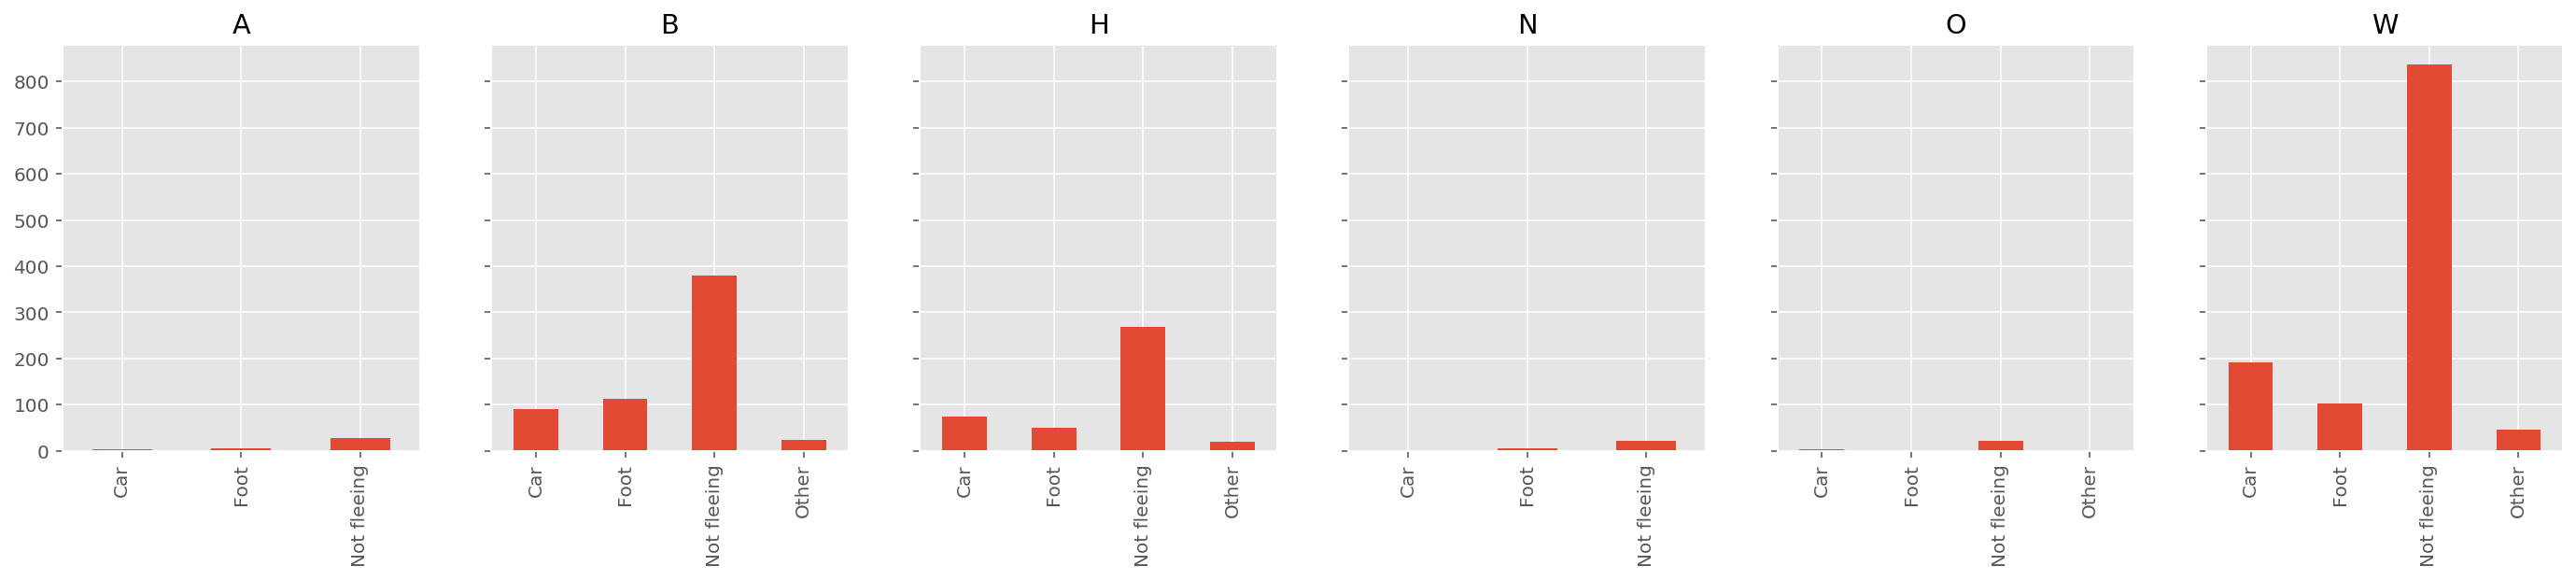

In [6]:
# Tranditional way
# iterator -> filter -> plot each of them
races = np.sort(data['race'].dropna().unique())
fig, axes = plt.subplots(1, len(races), figsize=(24, 4), sharey=True)
for ax, race in zip(axes, races):
    data[data['race']==race]['flee'].value_counts().sort_index().plot(kind='bar', ax=ax, title=race)

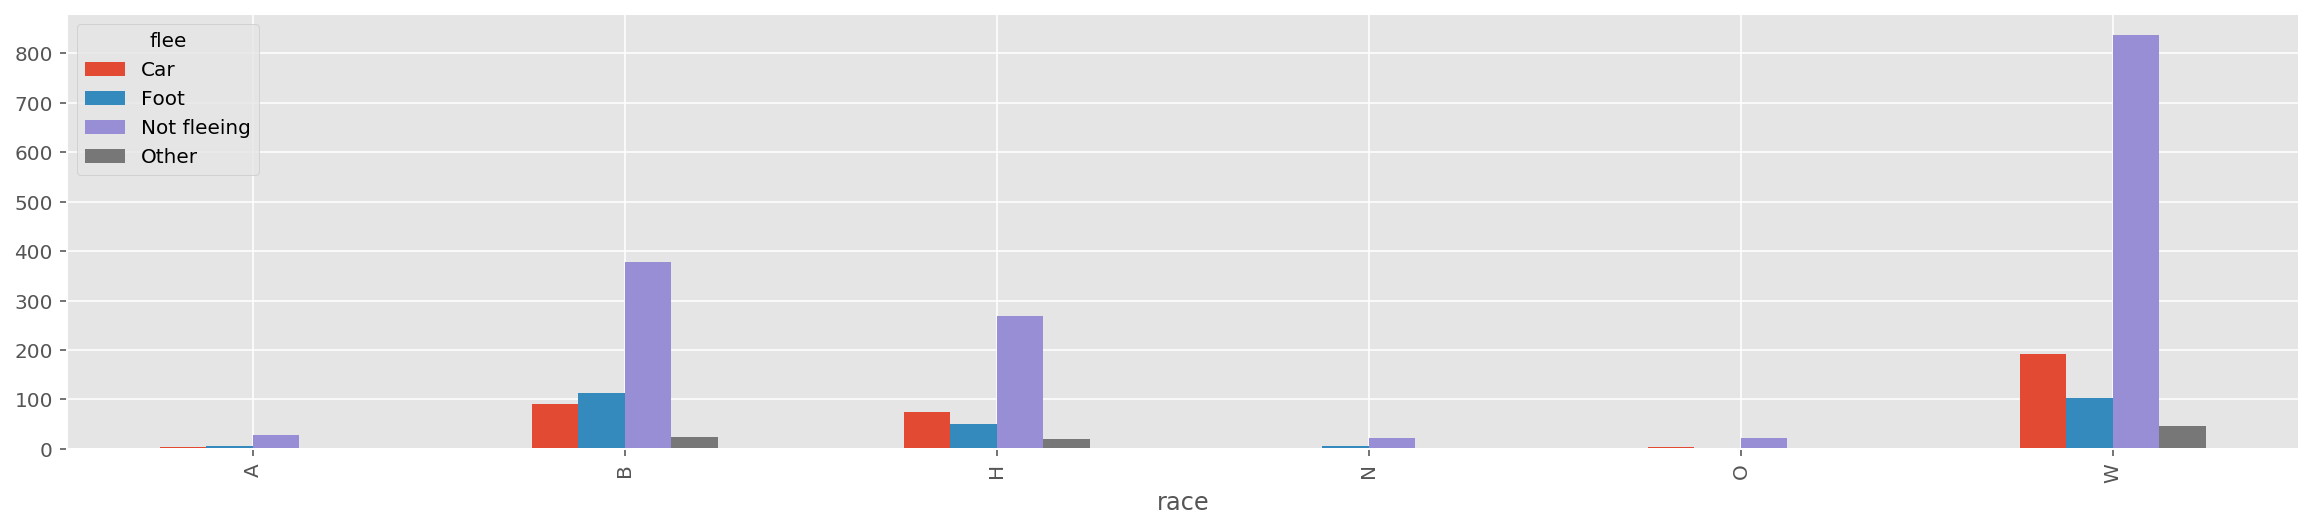

In [7]:
# Amazing Groupby!
data.groupby('race')['flee'].value_counts().unstack().plot(kind='bar', figsize=(20, 4))

---
Scene2 : The continuous distribution about flee method in different ages

flee
Car            AxesSubplot(0.125,0.125;0.775x0.755)
Foot           AxesSubplot(0.125,0.125;0.775x0.755)
Not fleeing    AxesSubplot(0.125,0.125;0.775x0.755)
Other          AxesSubplot(0.125,0.125;0.775x0.755)
Name: age, dtype: object

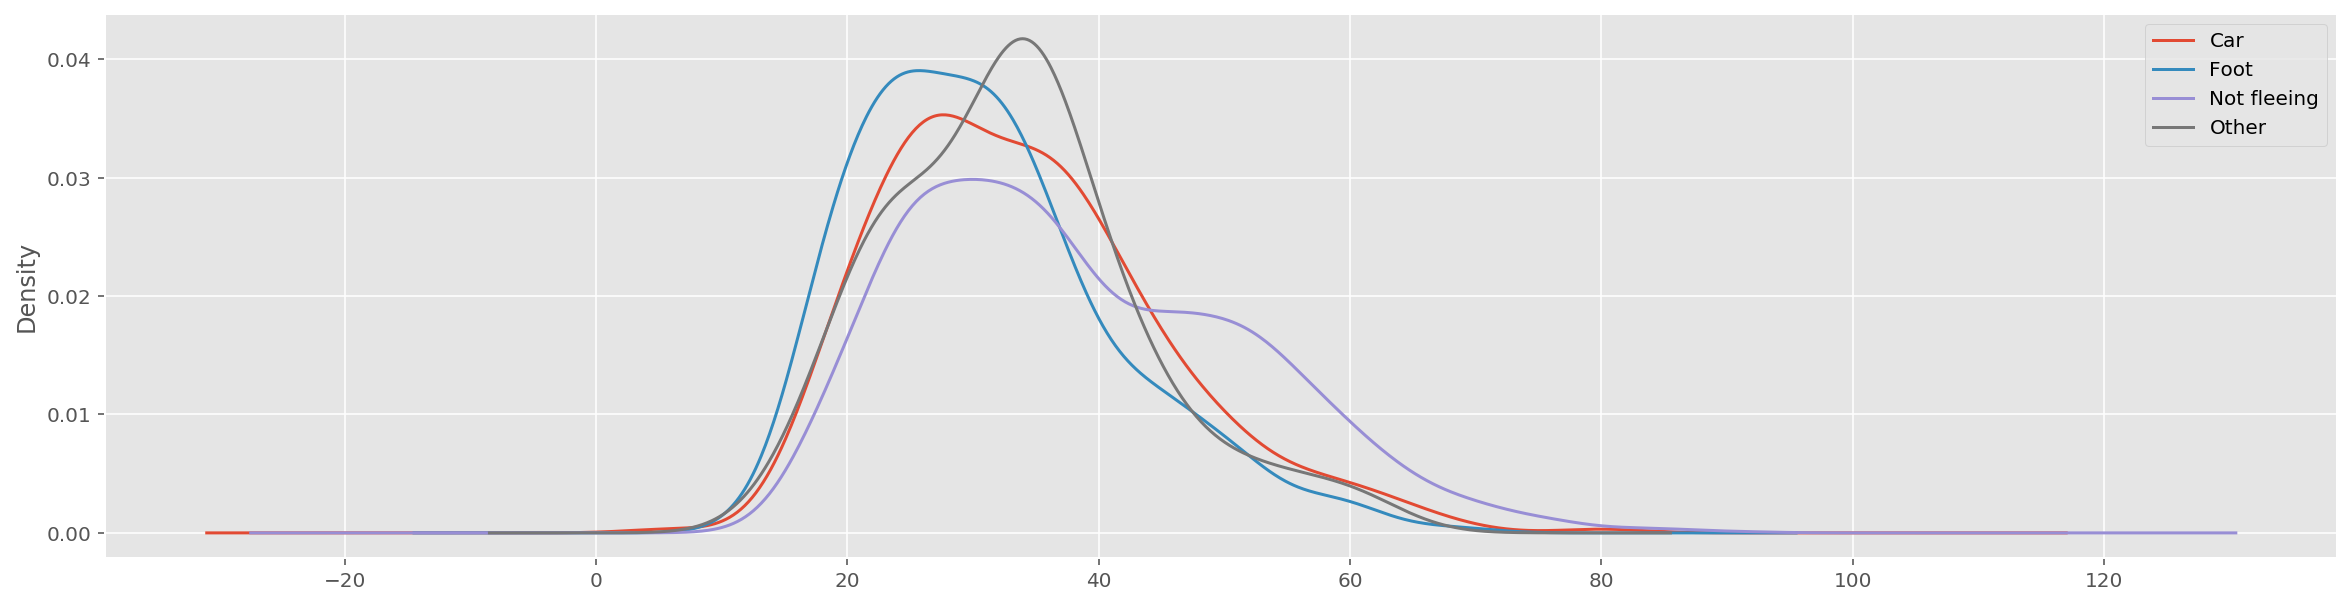

In [8]:
data.groupby('flee')['age'].plot(kind='kde', legend=True, figsize=(20, 5))

---
Scene3 : Apply different operations on different columns

In [9]:
# aggragate
data.groupby('race').agg({'age': np.median, 'signs_of_mental_illness': np.mean})

,age,signs_of_mental_illness
race,,
A,35.0,0.256410
B,30.0,0.153722
H,31.0,0.200946
N,29.0,0.258065
O,29.5,0.250000
W,38.0,0.318068


---
Scene4 : Apply different operations on one column

In [10]:
data.groupby('flee')['age'].agg([np.mean, np.median, np.std])

,mean,median,std
flee,,,
Car,33.911765,33.0,11.174234
Foot,30.972222,30.0,10.193900
Not fleeing,38.334753,36.0,13.527702
Other,33.239130,33.0,9.932043
